#Ordinary differential equations

One of the forms that computational experiments take is solving a differential equation. Usually this equation is the mathematical formulation of some physical principle. For instance:

$$
m\frac{d^2 x}{dt^2} = -kx
$$

represents the equation of motion of a bead of mass $m$ attached to a spring. Here we have used the approximation that the force is proportional to the displacement $F=-kx$ and Newton's second law $F=m\frac{d^2x}{dt^2}$ for a body of constant mass. 

In this section we deal with ordinary differential equations (ODE) that contain only one independent variable and derivatives of that variable. 

We will explore four methods to solve first order ODE. This means that we only have first derivatives in the differential equation. The equations can also be linear or non-linear. This refers to the algebraic order of the function included in the derivative.

The following is an example of a first order linear ODE:


$$
\frac{dy}{dt} = K^2(t) y(t)
$$

and this is a first order non-linear ODE:

$$
\frac{dy}{dt} = K^2(t) y(t) + K(t)y^3(t)
$$


#Solving ODEs

Consider now the equation

$$
\frac{dy}{dx} = y^{\prime} = f(x,y)
$$

We will consider now three different methods to solve it.

#Euler Method



We can approximate the first derivative around a given point $x_{0}$ as follows:

$$
y^{\prime}(x_0,y_0) \approx \frac{y(x)-y_0}{x-x_{0}}
$$

which basically approximates the first derivative as the slope of a line drawn between points $x_{0}$ and $x$. From this approximation we can get the value of our unknown function $y(x)$ in terms of things we can compute

$$
y(x) = y_{0} + (x-x_0)y^{\prime}(x_0,y_0)
$$

If we introduce a new variable $h=x - x_0$ one could rewrite this expression as

$$
y(x_0 + h) = y_{0} + hy^{\prime}(x_0,y_0) = y_0 + hf_0
$$

I would only need the value for $y_0$ to compute the solution. One way to see this solution is that starting with a value $y_0$ y build the solution step by step: $y(x_0+h)$, $y(x_0+2h)$, $y(x_0+3h)$ $\ldots$.

This can be expressed in general as

$$
y_{n+1} = y_{n} + hf(x_n, y_n)
$$


## Example

Let's consider the following first order non-linear ODE $y^{\prime} = -y $ on the range $0< x<2 $ for $y(0)=1 $. The analytic solution of this equation is $y = \exp(-x)$.

In [1]:
%pylab inline


Populating the interactive namespace from numpy and matplotlib


In [2]:
#we define first the value of h and the corresponding range in x
h=0.01
min_x = 0.0
max_x = 4.0
n_points = int((max_x - min_x)/h)
x = zeros(n_points)
y = zeros(n_points)

In [21]:
#I do the initialization for the first item y[0] and loop over the rest of the items
def func_prime(x,y):
    return -y

x[0] = min_x
y[0] = 1.0
for i in range(1,n_points):
    x[i] = x[i-1] + h
    y[i] = y[i-1] + h * func_prime(x[i-1],y[i-1])

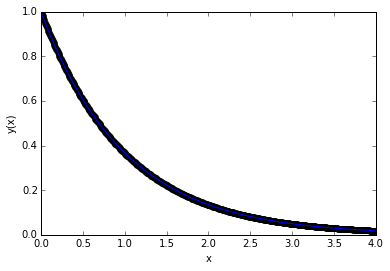

In [22]:
plot(x,y, 'ko')
plot(x,exp(-x))
plt.xlabel('x')
plt.ylabel('y(x)')

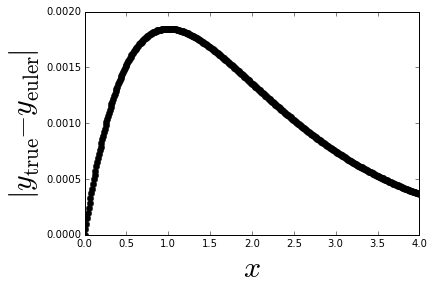

In [23]:
plot(x,abs(exp(-x)-y), 'ko')
plt.xlabel('$x$', size=30)
plt.ylabel('$|y_{\mathrm{true}}-y_{\mathrm{euler}}|$',size=30)

#Leap-Frog Method

This method uses the central difference approximation

$$
y^{\prime} (x_{n}, y_{n})\approx \frac{y_{n+1} - y_{n-1}}{2 h} 
$$

which leads to 

$$
y_{n+1} = y_{n-1} + 2hf(x_{n}, y_{n})
$$

In [24]:
#this can be implemented as follows
h=0.01
min_x = 0.0
max_x = 4.0
n_points = int((max_x - min_x)/h)
x = zeros(n_points)
y = zeros(n_points)

In [25]:
def func_prime(x,y):
    return -y

In [27]:
x[0] = min_x
y[0] = 1.0

x[1] = min_x + h
y[1] = y[0] + h*func_prime(x[0],y[0])

for i in range(2,n_points):
    x[i] = x[i-1] + h
    y[i] = y[i-2] + 2 * h * func_prime(x[i-1],y[i-1])

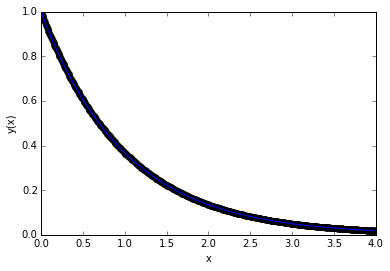

In [28]:
plot(x,y, 'ko')
plot(x,exp(-x))
plt.xlabel('x')
plt.ylabel('y(x)')

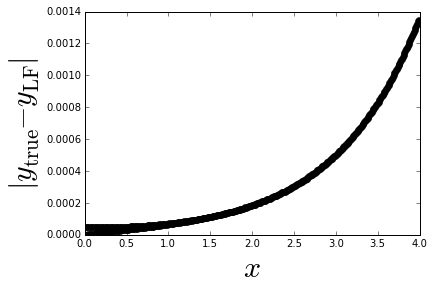

In [29]:
plot(x,abs(exp(-x)-y), 'ko')
plt.xlabel('$x$', size=30)
plt.ylabel('$|y_{\mathrm{true}}-y_{\mathrm{LF}}|$',size=30)

#Runge-Kutta of 2nd order

This method is a refinement over the Euler method. It computes the derivative at a point half-way between the $x_0$ and $x$. Meaning that we have
$$
x_{half} = x_{0} + \frac{h}{2}
$$

and 

$$
y_{half}  = y_{0} + \frac{h}{2}y^{\prime}(x_{0},y_{0})
$$

with these two expressions we can calculate $y^{\prime}= f(x_{half}, y_{half})$. With this value of the derivative the value of the function at $x_0 + h$ is computed as

$$
y_{1} = y_{0} + hy^{\prime} 
$$

In [30]:
#this can be implemented as follows
h=0.01
min_x = 0.0
max_x = 4.0
n_points = int((max_x - min_x)/h)
x = zeros(n_points)
y = zeros(n_points)

In [31]:
def func_prime(x,y):
    return -y

In [32]:
x[0] = min_x
y[0] = 1.0
for i in range(1,n_points):
    k1 = h * func_prime(x[i-1], y[i-1])
    k2 = h * func_prime(x[i-1] + 0.5 * h, y[i-1] + 0.5 * k1)
    x[i] = x[i-1] + h
    y[i] = y[i-1] + k2

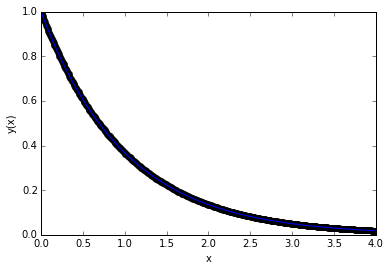

In [34]:
plot(x,y, 'ko')
plot(x,exp(-x))
plt.xlabel('x')
plt.ylabel('y(x)')

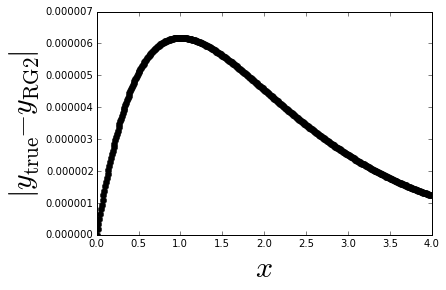

In [35]:
plot(x,abs(exp(-x)-y), 'ko')
plt.xlabel('$x$', size=30)
plt.ylabel('$|y_{\mathrm{true}}-y_{\mathrm{RG2}}|$',size=30)

#Runge-kutta of 4th order

This algorithm represents a further improvement. In this case the slope that is used to make the step is a weighted average of different slopes

$$
{\mathrm{slope}} = \frac{1}{6}(k_1 + 2k_2 + 2k_3 + k_4),
$$
where, 

* $k_1$ is the slope at the beginning of the inteval
* $k_2$ is the slope at the middle of the interval, using $k_1$ to determine the value of $y$.
* $k_3$ is the slope at the middle of the interval, but this time using $k_2$ to determine the value of $y$.
* $k_4$ is the slope at the end point, with its value determined using $k_3$

In [36]:
#here is an implementation
h=0.01
min_x = 0.0
max_x = 4.0
n_points = int((max_x - min_x)/h)
x = zeros(n_points)
y = zeros(n_points)

In [39]:
def func_prime(x,y):
    return -y

In [40]:
x[0] = min_x
y[0] = 1.0
for i in range(1,n_points):
    k1 = h * func_prime(x[i-1]          , y[i-1])
    k2 = h * func_prime(x[i-1] + 0.5 * h, y[i-1] + 0.5 * k1)
    k3 = h * func_prime(x[i-1] + 0.5 * h, y[i-1] + 0.5 * k2)
    k4 = h * func_prime(x[i-1] + h      , y[i-1] + k3)
    
    #fourth step
    average_k = (1.0/6.0)*(k1 + 2.0*k2 + 2.0*k3 + k4)
    
    x[i] = x[i-1] + h
    y[i] = y[i-1] + average_k

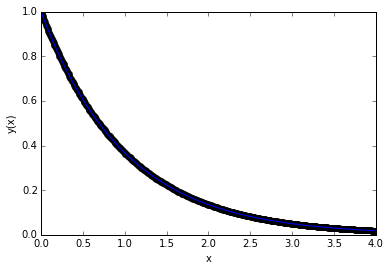

In [41]:
plot(x,y, 'ko')
plot(x,exp(-x))
plt.xlabel('x')
plt.ylabel('y(x)')

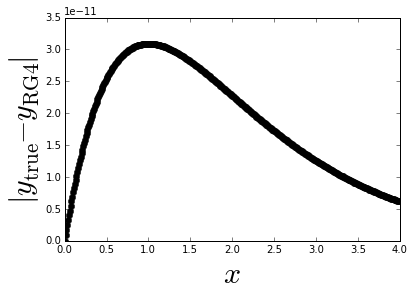

In [42]:
plot(x,abs(exp(-x)-y), 'ko')
plt.xlabel('$x$', size=30)
plt.ylabel('$|y_{\mathrm{true}}-y_{\mathrm{RG4}}|$',size=30)

#Exercises

1. Try solving the same differential equation using all the methods, with a smaller time-step (say h=0.1). Which method is the worst?

2. Solve the differential equation $y^{\prime} = 1+y^2$ in the interval $0 < x <1$ and the boundary condition $y(0)=0$. Use the four methods explained above. Compare the numerical solution against the analytical solution.